<a href="https://colab.research.google.com/github/hoseok94/241-2567-700/blob/main/projectcurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install ultralytics
!pip install --upgrade ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 42.3/235.7 GB disk)


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.0

import numpy as np
print(np.__version__)  # เช็กว่า numpy ทำงานได้ปกติหรือไม่

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
1.26.0


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Copy yolov11n.pt from Google Drive to Colab (replace with actual path)
!cp /content/drive/MyDrive/currency/Datasets/yolo11n-seg.pt /content/yolo11n-seg.pt




# Change Directory to the folder in Google Drive
%cd /content/drive/MyDrive/currency/Datasets

Mounted at /content/drive
/content/drive/MyDrive/currency/Datasets


In [4]:
from ultralytics import YOLO
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # ถ้าถูกต้องควรแสดง "cuda"

# โหลดโมเดล
model = YOLO("/content/drive/MyDrive/currency/Datasets/yolo11n-seg.pt")  # ระบุพาธโมเดล

# เทรนโมเดล
train_results = model.train(
    data="/content/drive/MyDrive/currency/Datasets/data.yaml",  # พาธไปยังไฟล์ YAML
    epochs=200,
    imgsz=640,
    device='0',
    workers=0
)

Using device: cuda
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/currency/Datasets/yolo11n-seg.pt, data=/content/drive/MyDrive/currency/Datasets/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=0, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

train: Scanning /content/drive/MyDrive/currency/Datasets/train/labels... 2510 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2510/2510 [04:41<00:00,  8.92it/s]


train: New cache created: /content/drive/MyDrive/currency/Datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/currency/Datasets/valid/labels... 217 images, 0 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:22<00:00,  9.46it/s]

val: New cache created: /content/drive/MyDrive/currency/Datasets/valid/labels.cache


Plotting labels to runs/segment/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.21G      1.061      3.027       4.07      1.402        130        640: 100%|██████████| 157/157 [01:40<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        217        735     0.0247      0.541     0.0404     0.0294     0.0225      0.501     0.0362     0.0246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.81G     0.9499      2.093      3.548      1.313        113        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.145       0.17     0.0967     0.0714      0.143      0.159     0.0889     0.0625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.82G      0.999      1.994      2.945      1.317        121        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        217        735      0.227      0.274      0.162       0.12      0.229      0.267      0.152      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.82G     0.9418      1.865      2.529      1.269        100        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.226      0.375      0.209      0.148       0.21      0.343      0.182       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.82G     0.9081      1.801      2.299      1.244         92        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.266      0.382      0.262      0.199      0.256      0.362      0.241      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.82G     0.8903      1.771      2.135      1.226        121        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        217        735      0.297      0.426      0.303      0.224      0.289      0.401       0.28      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.82G     0.8565      1.687      1.969      1.193         82        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.366      0.466      0.382      0.293      0.351      0.439      0.349      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.82G     0.8329      1.651      1.829      1.176        102        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.368      0.493      0.425      0.325      0.352       0.46      0.395      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.82G     0.8205      1.587      1.737      1.167         78        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735        0.4      0.506       0.45      0.347      0.386      0.488      0.419      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.82G     0.7976       1.57      1.662      1.156        149        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        217        735      0.479      0.487      0.474      0.361      0.471      0.472      0.451      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.82G     0.8047      1.557      1.589      1.156        129        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        217        735       0.45      0.526       0.48      0.362      0.457      0.473      0.445      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.82G     0.7843       1.49      1.516      1.145        100        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.468      0.513      0.519        0.4      0.488      0.465      0.484      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.82G     0.7696      1.481      1.424      1.132        138        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735       0.51      0.542      0.541      0.402      0.494      0.513      0.513      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.82G     0.7627      1.445      1.372      1.121         97        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.547      0.503      0.531      0.412      0.532      0.488        0.5      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.82G     0.7564      1.459      1.346      1.115        151        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.502      0.549      0.561      0.417      0.485      0.534       0.53      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.82G     0.7406       1.42      1.285       1.11        108        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.445      0.644      0.544      0.424      0.448      0.624      0.526      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.82G      0.747       1.39      1.261      1.111        106        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735       0.53      0.603      0.601      0.462      0.515      0.577      0.572      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.82G     0.7343      1.386      1.218      1.099        102        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.592      0.638      0.649      0.508      0.577      0.621      0.626      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.82G      0.729      1.375      1.191      1.099         71        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        217        735       0.56      0.645      0.636      0.499      0.546      0.628      0.603      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.82G     0.7162      1.362      1.148      1.096        131        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.513      0.667      0.658      0.514      0.496      0.646       0.63      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.82G     0.7145      1.335      1.126      1.092        103        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.569      0.572      0.609      0.469      0.564      0.557      0.586      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.82G     0.7087      1.319      1.103       1.09        131        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.649      0.577       0.66      0.503       0.63      0.559      0.624      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.82G     0.7082      1.322      1.068       1.09        132        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.684      0.542      0.616      0.482      0.665      0.528      0.589      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.82G     0.7044      1.306      1.052      1.083        120        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.616      0.589       0.65      0.512      0.605      0.564      0.613      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.82G     0.6982      1.292      1.044      1.078        148        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.709      0.573      0.646      0.508      0.695      0.563       0.62      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.82G     0.7034      1.292     0.9917       1.08        133        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.592       0.54      0.624      0.488      0.586      0.522      0.591      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.82G     0.6847      1.249     0.9777      1.068        105        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.652      0.599      0.662      0.526      0.638      0.589       0.63      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.82G     0.6667      1.245     0.9495      1.063        119        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        217        735      0.673      0.635      0.702      0.553       0.66      0.622      0.675      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.82G     0.6594      1.205     0.9277      1.059        109        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.672       0.56      0.654      0.516      0.649       0.54      0.617      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.82G      0.672       1.23     0.9424      1.063        121        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.716      0.568      0.664      0.519        0.7      0.555      0.632      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.82G     0.6747      1.249     0.9149      1.067        155        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.735       0.57      0.677      0.528       0.72      0.555      0.648      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.82G     0.6571      1.206     0.9006      1.056         72        640: 100%|██████████| 157/157 [01:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.736      0.585      0.695      0.552      0.712      0.571      0.666      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.82G     0.6521      1.196     0.8722      1.054        117        640: 100%|██████████| 157/157 [01:37<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.575       0.67      0.659      0.517      0.567      0.659      0.637      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.82G     0.6457      1.188     0.8648      1.049         71        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.731      0.581      0.659       0.51       0.74      0.564      0.641      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.82G     0.6482      1.193     0.8529      1.051        100        640: 100%|██████████| 157/157 [01:37<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.651      0.643      0.702      0.555      0.639      0.632      0.676      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.82G     0.6425      1.157     0.8427      1.044        128        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.678      0.608      0.674      0.535      0.682      0.593      0.656      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.82G     0.6363      1.147     0.8416      1.046        103        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.629      0.609       0.68      0.523      0.627      0.589      0.646      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.82G     0.6393      1.159     0.8228      1.044        120        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735        0.7       0.62      0.708      0.557      0.687      0.604       0.68      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.82G      0.639      1.174     0.8277      1.042         95        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.638      0.641      0.699      0.549      0.665      0.581      0.659      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.82G     0.6373      1.157     0.8184      1.044        161        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.722      0.563      0.678       0.53      0.721      0.531      0.641      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.82G     0.6223      1.124     0.7849      1.036         84        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.686      0.609      0.695      0.551      0.666      0.597      0.663      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.82G     0.6329      1.134     0.7923      1.038        111        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.711      0.594      0.669      0.525      0.696       0.58      0.646      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.82G     0.6178        1.1      0.777      1.032        114        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.731      0.574      0.674      0.531      0.726       0.57      0.653       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.82G     0.6241      1.117     0.7711      1.034        103        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.718      0.591      0.692       0.55      0.708      0.578      0.662      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.82G     0.6198      1.119     0.7668       1.03        154        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.721      0.572      0.681      0.545      0.691       0.57      0.657      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.82G     0.6229      1.101     0.7647      1.033         92        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735      0.662      0.632      0.667      0.525      0.646      0.618      0.643      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.82G     0.6173      1.111      0.746       1.03        115        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.729       0.61        0.7      0.561      0.714      0.593      0.668      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      3.82G     0.6156      1.101     0.7391       1.03        119        640: 100%|██████████| 157/157 [01:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        217        735      0.724       0.58       0.69      0.543      0.708       0.57      0.661      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.82G     0.6066       1.11     0.7418      1.032        116        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.698      0.615      0.687      0.549      0.681        0.6      0.662      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.82G     0.5995      1.084     0.7211      1.025        103        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.727      0.566      0.687       0.54      0.723      0.546      0.658      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.82G       0.61      1.093       0.73       1.03        125        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.721      0.605      0.696      0.554      0.711        0.6      0.681      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.82G     0.6003      1.065     0.7101      1.022        113        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.705      0.641      0.712      0.568      0.678       0.62      0.675      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      3.82G     0.5968       1.05     0.6972      1.023         85        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735      0.728      0.615        0.7      0.565      0.731      0.588      0.673      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.82G     0.5995      1.054     0.7048      1.021         96        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.733      0.616      0.701      0.565      0.713      0.604      0.682       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      3.82G     0.5915      1.059     0.6848      1.019        120        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.679      0.657      0.711      0.563      0.662      0.637      0.685      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.82G     0.5974      1.053     0.6913      1.018        115        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.657      0.651      0.687      0.542      0.646      0.641      0.668      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.82G     0.5771      1.025     0.6693      1.013        119        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.787      0.579      0.709      0.563       0.77      0.569      0.681      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.82G     0.5749      1.012     0.6657      1.008        152        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.765      0.632      0.726      0.571      0.752      0.617      0.696      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      3.82G     0.5821      1.037     0.6817      1.013         84        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.725      0.631      0.709      0.561      0.715      0.616      0.679      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.82G     0.5889      1.051     0.6658      1.018         92        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.684      0.652      0.711      0.567      0.752      0.585       0.69      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.82G      0.578      1.025     0.6758       1.01        118        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735       0.68      0.631      0.698      0.556      0.775      0.553      0.676      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.82G     0.5784      1.013     0.6619      1.012        109        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.771      0.595      0.713      0.567      0.764       0.59      0.697      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.82G      0.576      1.013      0.657      1.009        131        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.795      0.603      0.711      0.569       0.78      0.588      0.691      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.82G     0.5688      1.038     0.6504      1.008        136        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.741      0.628      0.723      0.585      0.733      0.618        0.7       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.82G     0.5706      1.004     0.6483      1.007        108        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        217        735      0.769       0.62      0.721       0.57      0.761      0.612      0.703      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.82G     0.5701     0.9993     0.6456      1.006        100        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.725       0.64      0.725      0.572      0.705      0.625      0.694      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.82G     0.5664     0.9956     0.6327      1.004        104        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.755        0.6       0.72      0.577      0.731        0.6      0.693      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.82G     0.5671      1.024     0.6242      1.006         94        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.711      0.618      0.712      0.566      0.697      0.607       0.69      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      3.82G     0.5571     0.9827     0.6288          1        103        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.726      0.633      0.707      0.569      0.716      0.624      0.689      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      3.82G     0.5567     0.9675     0.6051      0.999         76        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.695      0.663      0.729      0.587      0.681      0.651      0.704      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.82G     0.5665       1.02     0.6313      1.008        100        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        217        735      0.688      0.649        0.7      0.562      0.671      0.631      0.674      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      3.82G     0.5603     0.9917     0.6201          1        131        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.768      0.576      0.712      0.574      0.746      0.562      0.683      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.82G     0.5473     0.9743     0.6077      0.999         93        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.767      0.618      0.716      0.567      0.742      0.604      0.684      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.82G     0.5527      0.976     0.6021     0.9957        111        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.683       0.69      0.734      0.584      0.671      0.677      0.709      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.82G     0.5499     0.9794      0.599      0.998         96        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.752      0.583        0.7      0.546      0.732      0.568      0.668      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      3.82G     0.5471     0.9589      0.589     0.9967        123        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735      0.723      0.623      0.698      0.554      0.709      0.608      0.675      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.82G     0.5554      0.972     0.6083      1.001        108        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735      0.755      0.598      0.693      0.544      0.732      0.588       0.67        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      3.82G     0.5416     0.9377     0.5975     0.9955         94        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.721       0.64      0.705      0.558      0.705      0.619      0.677      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.82G     0.5437     0.9513     0.5835     0.9932         93        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.783      0.578      0.725      0.572      0.763      0.566      0.698      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      3.82G     0.5479      0.956     0.5962     0.9971        125        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.767      0.615      0.711      0.561      0.755      0.607      0.691      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.82G     0.5442     0.9515     0.5854     0.9914        137        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735      0.721      0.626      0.701      0.555      0.706      0.616      0.679      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      3.82G     0.5455     0.9593     0.5915     0.9993        116        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.736      0.622       0.71      0.564       0.72       0.61      0.686      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      3.82G     0.5354     0.9319     0.5806     0.9897        127        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.765      0.598      0.706      0.562      0.754      0.589      0.686      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.82G     0.5348     0.9426     0.5757     0.9938        125        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.746      0.615      0.709      0.568      0.764      0.592      0.691      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.82G     0.5336     0.9296     0.5633     0.9889         85        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735       0.71      0.619      0.691      0.559      0.704      0.605      0.672      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      3.82G     0.5276       0.94     0.5693     0.9902         95        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.735      0.619      0.705      0.562      0.718      0.607      0.679      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.82G     0.5281     0.9208     0.5655     0.9906        114        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.742      0.619      0.707      0.569      0.715      0.603      0.681      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      3.82G     0.5248     0.9146     0.5659     0.9849        101        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735        0.7      0.656      0.717      0.575      0.772      0.582      0.694      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.82G     0.5277     0.9199     0.5605     0.9861        110        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.729      0.662      0.721      0.579      0.715      0.651        0.7      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.82G     0.5294     0.9281      0.562     0.9867        118        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        217        735      0.759      0.619      0.714      0.572      0.738      0.609      0.688      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.82G     0.5258     0.9088     0.5517     0.9861        169        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.752      0.623      0.722      0.576      0.745       0.61      0.698      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.82G     0.5242     0.9114     0.5479     0.9851        119        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.755      0.613       0.71       0.56      0.746      0.605       0.69      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.82G     0.5214     0.9293      0.546     0.9823         66        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.733       0.63      0.708      0.574       0.72      0.618      0.688      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.82G     0.5309     0.9352     0.5534     0.9863         92        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.727      0.622      0.699      0.562      0.737      0.606      0.685      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      3.82G     0.5214     0.9118     0.5445     0.9828         76        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.764      0.637      0.713      0.575      0.761       0.63      0.699      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.82G     0.5123     0.8885     0.5379     0.9822         91        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.749      0.622      0.718      0.575      0.748      0.603      0.685      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.82G     0.5234      0.902     0.5446      0.983         96        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735       0.68      0.659      0.709      0.571      0.717      0.607      0.686      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.82G     0.5205     0.9027     0.5445      0.982         94        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.795      0.603      0.721      0.581      0.787      0.595      0.704      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      3.82G     0.5144     0.8831     0.5337      0.981        111        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.778      0.622      0.723      0.578      0.763      0.611        0.7      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      3.82G     0.5143     0.8892     0.5364     0.9825         86        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.734      0.644      0.719      0.572      0.723      0.638      0.703       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.82G     0.4985     0.8653     0.5147     0.9731        105        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.755      0.625      0.724      0.583      0.755      0.605      0.702      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.82G     0.5109     0.8739     0.5253     0.9786        127        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.703       0.63      0.693      0.562      0.687      0.614      0.675      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.82G     0.5155     0.8996     0.5301     0.9777         97        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        217        735      0.777      0.608      0.715      0.578      0.773      0.598      0.698      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      3.82G     0.5083     0.8727     0.5258     0.9742        143        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.784      0.631      0.724      0.576      0.769      0.618      0.701      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.82G     0.5066     0.8763     0.5189     0.9745         74        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.733       0.62      0.712      0.568      0.704        0.6      0.684       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.82G     0.5028     0.8768     0.5162     0.9738        119        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.751      0.635      0.722      0.583      0.737      0.626      0.704      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      3.82G     0.5065      0.878     0.5183      0.972        137        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.724      0.634      0.726      0.581      0.713      0.619       0.71      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      3.82G     0.5038     0.8731     0.5218     0.9756        154        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.799      0.576      0.714      0.571      0.785      0.566      0.694      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.82G     0.5034     0.8721     0.5154     0.9753        104        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.732      0.621      0.721      0.579      0.711      0.618      0.702      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      3.82G     0.4945     0.8577     0.5051     0.9715        116        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735       0.73      0.638      0.721      0.578      0.723      0.631      0.708      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      3.82G     0.4992     0.8485     0.5077     0.9684        133        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.702      0.647      0.711      0.575      0.705      0.633      0.701      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      3.82G     0.5015       0.86     0.5084     0.9742         76        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        217        735      0.723      0.628      0.709      0.567      0.708      0.616      0.691      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      3.82G     0.4962     0.8594     0.5068     0.9705        131        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735       0.68      0.654      0.713      0.575      0.673      0.631      0.694      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.82G     0.4915     0.8483     0.5045     0.9685        115        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.671      0.643      0.714      0.573      0.661      0.632      0.694      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      3.82G       0.49     0.8423      0.497     0.9672         87        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.725      0.608        0.7      0.557      0.716      0.596      0.677      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      3.82G     0.5003     0.8484     0.5187     0.9705        112        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.719      0.631      0.708      0.568      0.713      0.613      0.684       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.82G     0.4958     0.8658     0.4983     0.9702        141        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.679      0.648       0.69      0.554      0.666      0.637      0.673      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.82G     0.4927     0.8681     0.4883     0.9703        116        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.682      0.655      0.703      0.568      0.701      0.619      0.689      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      3.82G      0.485     0.8414     0.4952     0.9637         92        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.732       0.61      0.696      0.561       0.71      0.605      0.684      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.82G     0.4895     0.8517     0.4889     0.9662        139        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.711      0.638      0.707      0.569      0.696      0.621      0.684      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.82G     0.4841      0.847     0.4909     0.9678        145        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.717      0.616      0.705      0.567      0.704      0.601      0.686      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.82G     0.4857     0.8432     0.4926     0.9669        137        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.737       0.63      0.724      0.583      0.763      0.591      0.705      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.82G     0.4827     0.8509     0.4896     0.9648        128        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.744      0.617      0.709      0.575      0.727      0.605      0.685      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.82G     0.4843     0.8247     0.4846     0.9652        134        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.736      0.622      0.709      0.572      0.721      0.609      0.692       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.82G      0.485     0.8386     0.4854     0.9692        111        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.754      0.622      0.718      0.575      0.742      0.611        0.7      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.82G     0.4792      0.817     0.4792     0.9674        110        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.716      0.639      0.718      0.575       0.78      0.586      0.701       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.82G     0.4844     0.8509     0.4912     0.9669        125        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735       0.75       0.61      0.712      0.573      0.741        0.6      0.697      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.82G     0.4841     0.8352     0.4785     0.9647        120        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.772      0.605      0.705      0.562      0.756      0.598      0.691      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.82G     0.4761       0.82     0.4811     0.9623        108        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.763      0.595      0.707      0.563      0.759      0.586      0.694      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.82G     0.4802     0.8318     0.4771     0.9633        122        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.731      0.641       0.71      0.569      0.716      0.629      0.688      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.82G     0.4702     0.8101     0.4747     0.9611         86        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.765      0.599      0.713       0.57      0.764      0.591      0.699      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.82G     0.4667     0.8074     0.4687      0.959        140        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.764      0.592      0.706      0.565       0.75       0.58      0.686      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.82G     0.4672     0.8145     0.4709     0.9598        132        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.668      0.646      0.698      0.563      0.655      0.632      0.682       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.82G     0.4682     0.8012     0.4627      0.955        111        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.727      0.629      0.716      0.572      0.713       0.62      0.698      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.82G     0.4708     0.8117     0.4625     0.9581        103        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.706      0.646      0.711      0.573      0.696      0.638      0.698      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.82G     0.4676     0.8057     0.4672     0.9557        107        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.758      0.621      0.716      0.571      0.747      0.607      0.689      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.82G     0.4688     0.8139     0.4651     0.9597        104        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        217        735      0.738      0.637      0.724      0.587      0.724      0.631      0.703      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.82G     0.4655      0.805     0.4637     0.9537        107        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.814      0.574       0.72      0.581      0.808      0.569      0.701      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.82G     0.4652      0.805      0.457     0.9589         85        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.744      0.625      0.711      0.572      0.726      0.621      0.688      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.82G     0.4662     0.8066      0.459     0.9543        111        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735       0.77       0.62      0.711      0.565      0.755      0.611      0.693      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.82G     0.4731     0.8219      0.463     0.9627         92        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.782      0.605      0.708      0.566      0.775      0.599      0.692      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      3.82G     0.4637     0.8065      0.463     0.9619        103        640: 100%|██████████| 157/157 [01:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.765      0.614      0.714      0.573       0.75      0.604      0.693      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      3.82G     0.4605     0.7922     0.4483      0.956         86        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.797      0.602      0.716      0.573      0.784      0.592      0.701      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.82G     0.4601      0.801     0.4539     0.9569         94        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.763      0.622      0.724       0.58       0.75      0.608      0.701      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.82G     0.4584     0.7984     0.4574     0.9566        113        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.821      0.577      0.715      0.575      0.795      0.575        0.7      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.82G     0.4635      0.786     0.4533      0.959         82        640: 100%|██████████| 157/157 [01:36<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.727      0.631      0.704      0.568      0.716      0.623      0.687      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.82G     0.4565     0.7826     0.4448     0.9542        105        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735       0.81      0.579      0.717      0.571      0.809      0.569      0.695      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.82G     0.4618     0.7708     0.4493     0.9545        109        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.788      0.593      0.713      0.573      0.776      0.584      0.695      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      3.82G     0.4582     0.7763     0.4459     0.9526        128        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735       0.75      0.633      0.715      0.569      0.723      0.624      0.691      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.82G     0.4575     0.7993     0.4468     0.9587         80        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735       0.78       0.62      0.714      0.574      0.764      0.607      0.693      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.82G     0.4529     0.7874     0.4469     0.9504        118        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.838      0.583      0.718      0.574      0.826      0.572      0.693      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.82G     0.4485     0.7696      0.447     0.9547         92        640: 100%|██████████| 157/157 [01:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        217        735      0.783      0.587       0.71      0.569      0.793      0.569      0.689      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.82G     0.4503     0.7766      0.443     0.9514        112        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        217        735      0.773      0.606      0.712       0.57      0.762      0.599      0.693      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      3.82G     0.4492     0.7629     0.4358     0.9478        109        640: 100%|██████████| 157/157 [01:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.781      0.595      0.714      0.571      0.769       0.59      0.695      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.82G     0.4461     0.7766     0.4417     0.9503        122        640: 100%|██████████| 157/157 [01:33<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.834      0.573      0.716      0.575      0.815      0.572      0.696      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.82G     0.4511      0.767     0.4446     0.9513        103        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.804      0.594      0.717      0.578      0.791      0.588      0.696      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      3.82G     0.4499     0.7705     0.4382     0.9502         96        640: 100%|██████████| 157/157 [01:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        217        735      0.807      0.585      0.714      0.573      0.796      0.577      0.697      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.82G     0.4478     0.7683     0.4301     0.9479        118        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.784      0.603      0.718      0.578       0.77      0.593      0.698      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      3.82G     0.4441     0.7584     0.4292     0.9509        106        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.838      0.583      0.715      0.575      0.834      0.578      0.698      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.82G     0.4444     0.7565     0.4347     0.9475        112        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.831      0.575      0.709      0.574      0.824      0.572      0.691      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      3.82G     0.4463     0.7631     0.4327       0.95        101        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735       0.81      0.585      0.713      0.574      0.802      0.577      0.695      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      3.82G     0.4546     0.7761     0.4367     0.9529        103        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.717      0.634       0.71      0.572      0.709      0.624      0.692      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.82G     0.4426     0.7624     0.4294     0.9432         85        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735       0.74      0.616      0.714      0.573      0.801      0.571      0.695      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.82G     0.4429     0.7559     0.4265     0.9459         94        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.782        0.6      0.715      0.573      0.804      0.583      0.697      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      3.82G     0.4353     0.7391      0.421      0.947        108        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        217        735      0.788      0.585      0.706      0.571      0.778      0.579      0.687      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      3.82G     0.4398     0.7528     0.4194     0.9473         79        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735       0.76       0.59      0.699      0.563      0.747      0.582      0.683      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.82G      0.438     0.7367     0.4189     0.9454        106        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.774      0.587      0.704      0.568      0.769      0.576       0.69      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.82G     0.4391     0.7496     0.4208     0.9474        129        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.787        0.6      0.703      0.562      0.764      0.593      0.684      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.82G     0.4334     0.7457     0.4219      0.944        122        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.765      0.614      0.711      0.571       0.75      0.605      0.694      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.82G     0.4475       0.77     0.4307     0.9477        108        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        217        735      0.734      0.625      0.711      0.574      0.718      0.617      0.694      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      3.82G     0.4291     0.7377     0.4112     0.9433        133        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.738      0.628      0.708      0.567      0.728      0.619      0.692      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      3.82G     0.4371     0.7497      0.417      0.947        111        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735       0.74      0.635      0.711      0.574      0.734      0.629      0.694      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.82G     0.4401     0.7605     0.4253     0.9473        161        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.761       0.62       0.71      0.571      0.748      0.611       0.69      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.82G     0.4349     0.7609      0.422     0.9466        117        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735       0.75      0.615      0.708       0.57       0.74      0.609      0.689      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      3.82G     0.4376     0.7619     0.4232      0.947        130        640: 100%|██████████| 157/157 [01:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.757      0.618      0.709      0.569      0.746      0.611      0.686      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.82G     0.4269     0.7377     0.4089     0.9404         91        640: 100%|██████████| 157/157 [01:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.755      0.618      0.708      0.568      0.744      0.609      0.691      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      3.82G     0.4287     0.7358      0.419     0.9417        105        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.737      0.624      0.712      0.572      0.725      0.615      0.694       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.82G     0.4297     0.7437     0.4112     0.9432        114        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.776      0.608      0.714      0.573      0.729      0.624      0.697      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.82G     0.4325     0.7363      0.416     0.9431         90        640: 100%|██████████| 157/157 [01:34<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.733      0.632      0.713      0.572      0.724      0.623      0.696      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.82G     0.4263     0.7409     0.4099     0.9425        117        640: 100%|██████████| 157/157 [01:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        217        735      0.751      0.628      0.712      0.575      0.767      0.598      0.696      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      3.82G     0.4271     0.7347     0.4103     0.9406         95        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735      0.758      0.626      0.713      0.574      0.748      0.615      0.697      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.82G     0.4293     0.7361     0.4163      0.943        132        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.777      0.626      0.716      0.577      0.765      0.618      0.701      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      3.82G     0.4286     0.7352     0.4047     0.9417         79        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.786      0.622      0.721      0.579      0.773      0.612      0.706      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      3.82G     0.4299     0.7182     0.4067     0.9407         90        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.783      0.613      0.722      0.581      0.774      0.604      0.709      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.82G      0.434     0.7389     0.4147     0.9452        119        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.768      0.625      0.724      0.584      0.759      0.613      0.707      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.82G     0.4292     0.7375     0.4078      0.944        121        640: 100%|██████████| 157/157 [01:34<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.745      0.639       0.72      0.581      0.722      0.636      0.705      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.82G     0.4273     0.7268     0.4097     0.9451        127        640: 100%|██████████| 157/157 [01:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        217        735      0.813      0.603      0.719      0.579      0.754      0.617      0.705      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      3.82G     0.4258     0.7191     0.4023     0.9405         89        640: 100%|██████████| 157/157 [01:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        217        735      0.778       0.62      0.718       0.58      0.769      0.611      0.707      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.82G     0.4208     0.7267     0.4031     0.9369        116        640: 100%|██████████| 157/157 [01:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        217        735      0.741      0.637      0.721       0.58      0.732      0.629      0.712       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.82G     0.4262     0.7315     0.4025      0.939        109        640: 100%|██████████| 157/157 [01:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        217        735      0.756      0.631      0.721       0.58      0.748      0.622       0.71      0.539


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      3.84G     0.3666     0.6327     0.3408     0.9393         46        640: 100%|██████████| 157/157 [01:21<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735       0.77      0.634       0.72      0.575      0.763      0.618      0.702      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      3.84G     0.3363     0.5576     0.2893      0.916         35        640: 100%|██████████| 157/157 [01:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        217        735      0.798      0.614      0.721      0.571       0.79      0.604      0.699      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      3.84G      0.336     0.5611     0.2853     0.9234         56        640: 100%|██████████| 157/157 [01:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.749      0.648      0.725      0.577      0.741      0.634      0.704      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.84G     0.3359     0.5633     0.2836     0.9195         42        640: 100%|██████████| 157/157 [01:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        217        735      0.798       0.61      0.729       0.58      0.793      0.598      0.704      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      3.84G     0.3307     0.5576     0.2771     0.9127         54        640: 100%|██████████| 157/157 [01:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.736       0.65       0.73      0.579      0.774      0.605      0.707      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      3.84G     0.3247     0.5518     0.2738     0.9167         36        640: 100%|██████████| 157/157 [01:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        217        735      0.731      0.652      0.731       0.58      0.766      0.606      0.708      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      3.84G     0.3259     0.5487     0.2738     0.9137         50        640: 100%|██████████| 157/157 [01:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        217        735      0.778      0.619       0.73      0.581      0.765      0.609      0.705      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      3.84G     0.3275      0.554     0.2772     0.9177         42        640: 100%|██████████| 157/157 [01:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        217        735      0.779      0.625      0.731       0.58      0.764      0.616      0.707      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      3.84G     0.3241     0.5391     0.2698     0.9082         56        640: 100%|██████████| 157/157 [01:20<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        217        735       0.79      0.605      0.728      0.579      0.774      0.595      0.706      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      3.84G     0.3251     0.5368     0.2723     0.9154         45        640: 100%|██████████| 157/157 [01:20<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        217        735      0.739      0.639      0.727      0.578      0.732      0.628      0.705      0.533



200 epochs completed in 5.472 hours.
Optimizer stripped from runs/segment/train12/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train12/weights/best.pt, 6.0MB

Validating runs/segment/train12/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,839,638 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


                   all        217        735      0.769      0.625      0.723      0.583      0.757      0.615      0.707      0.539
     banknote_10000JPY         30         88      0.648      0.705      0.702      0.523      0.638      0.693      0.685      0.448
      banknote_1000JPY         24         59      0.727      0.678      0.761      0.614      0.636      0.593      0.675      0.441
      banknote_1000THB         18         51      0.747      0.314      0.526      0.391      0.794      0.333      0.551      0.383
       banknote_100CNY         19         38      0.789      0.711      0.839       0.63      0.761      0.684      0.811      0.648
       banknote_100THB         22         45      0.796       0.52       0.65      0.488      0.751      0.489      0.548      0.371
       banknote_100USD         25         80      0.687      0.463      0.464      0.348      0.706      0.475      0.483      0.311
        banknote_10CNY         15         19      0.605      0.807   

In [5]:
!ls /content/drive/MyDrive/currency/Datasets/data.yaml


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

Using device: cuda

image 1/1 /content/drive/MyDrive/currency/Datasets/test/005.jpg: 576x640 1 banknote_100USD, 1 banknote_10USD, 1 banknote_1USD, 1 banknote_20USD, 1 banknote_2USD, 1 banknote_50USD, 1 banknote_5USD, 84.1ms
Speed: 3.1ms preprocess, 84.1ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 640)
คลาส: banknote_20USD, ความมั่นใจ: 97.46%
คลาส: banknote_1USD, ความมั่นใจ: 97.10%
คลาส: banknote_10USD, ความมั่นใจ: 96.25%
คลาส: banknote_50USD, ความมั่นใจ: 96.21%
คลาส: banknote_5USD, ความมั่นใจ: 96.16%
คลาส: banknote_100USD, ความมั่นใจ: 95.38%
คลาส: banknote_2USD, ความมั่นใจ: 90.73%
จำนวนเงินรวมในภาพคือ: 6288.43 บาท


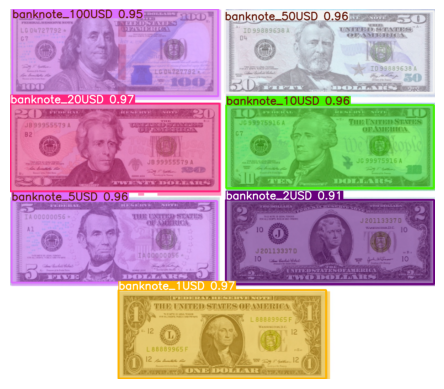

In [19]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch


#อัปเดตอัตราแลกเปลี่ยน (ณ วันที่ 13 มีนาคม 2568 จากไฟล์ของคุณ)
exchange_rates = {
    "JPY_to_THB": 21.785 / 100,  # เยน (ต่อ 1 เยน) เป็นบาท
    "USD_to_THB": 33.4491,       # ดอลลาร์สหรัฐเป็นบาท
    "CNY_to_THB": 4.546,         # หยวนเป็นบาท
    "GBP_to_THB": 41.9005,       # ปอนด์สเตอร์ลิงเป็นบาท
    "THB_to_THB": 1              # บาทยังคงเป็นบาท
}
# ตรวจสอบการใช้งาน GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# ชี้พาธไฟล์โมเดลให้ถูกต้อง
model = YOLO("/content/drive/MyDrive/currency/Datasets/runs/segment/train12/weights/best.pt")

# พาธรูปภาพที่ต้องการตรวจจับ
image_path = "/content/drive/MyDrive/currency/Datasets/test/005.jpg"

# ทำการตรวจจับ
results = model(image_path, conf=0.5)

#ตัวแปรสะสมมูลค่าเงินรวม (เงินบาท)
total_amount_THB = 0

#ดิกชันนารีจับคู่ธนบัตรกับมูลค่า
class_values = {
    "banknote_10000JPY": 10000,
    "banknote_1000JPY": 1000,
    "banknote_1000THB": 1000,
    "banknote_100CNY": 100,
    "banknote_100THB": 100,
    "banknote_100USD": 100,
    "banknote_10CNY": 10,
    "banknote_10GBP": 10,
    "banknote_10USD": 10,
    "banknote_1CNY": 1,
    "banknote_1USD": 1,
    "banknote_2000JPY": 2000,
    "banknote_20CNY": 20,
    "banknote_20GBP": 20,
    "banknote_20THB": 20,
    "banknote_20USD": 20,
    "banknote_2USD": 2,
    "banknote_5000JPY": 5000,
    "banknote_500THB": 500,
    "banknote_50CNY": 50,
    "banknote_50GBP": 50,
    "banknote_50THB": 50,
    "banknote_50USD": 50,
    "banknote_5CNY": 5,
    "banknote_5GBP": 5,
    "banknote_5USD": 5
}

confidence_threshold = 0.5  # กำหนดเกณฑ์ความมั่นใจขั้นต่ำ (80%)
for box in results[0].boxes:
    cls_id = int(box.cls)  # ดึง ID ของคลาส
    class_name = model.names[cls_id]  # เชื่อมโยง ID คลาสกับชื่อคลาส
    confidence = box.conf.item()  # ระดับความมั่นใจ

    if confidence > confidence_threshold:  # ตรวจสอบเฉพาะวัตถุที่มีความมั่นใจมากกว่าเกณฑ์
        print(f"คลาส: {class_name}, ความมั่นใจ: {confidence * 100:.2f}%")

        # ตรวจสอบและแปลงค่าเงินเป็นบาท
        if "JPY" in class_name:
            total_amount_THB += class_values.get(class_name, 0) * exchange_rates["JPY_to_THB"]
        elif "USD" in class_name:
            total_amount_THB += class_values.get(class_name, 0) * exchange_rates["USD_to_THB"]
        elif "CNY" in class_name:
            total_amount_THB += class_values.get(class_name, 0) * exchange_rates["CNY_to_THB"]
        elif "GBP" in class_name:
            total_amount_THB += class_values.get(class_name, 0) * exchange_rates["GBP_to_THB"]
        elif "THB" in class_name:
            total_amount_THB += class_values.get(class_name, 0)
#แสดงผลรวมของมูลค่าเงิน
print(f"จำนวนเงินรวมในภาพคือ: {total_amount_THB:.2f} บาท")
#แสดงภาพผลลัพธ์พร้อมกรอบที่ตรวจจับ
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()


In [ ]:
print(f"Class Name: {class_name}, Value: {class_values.get(class_name, 0)}, Exchange Rate: {exchange_rates['USD_to_THB']}")
print(f"Current Total (THB): {total_amount_THB}")
